In [293]:
# import libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
import pandas as pd
import yfinance as yf
import warnings

In [294]:
# Database
start = "2012-01-01"
end   = "2025-12-31"

us_tech = ['AAPL','MSFT','GOOGL','AMZN','META','NVDA','AVGO','TSLA','ORCL','INTC']
us_energy = ['XOM', 'CVX', 'COP', 'EOG', 'PSX', 'VLO', 'MPC', 'OXY', 'SLB']

tickers = us_tech + us_energy
sectors = (["US Tech"]*len(us_tech)) + (["EU Energy"]*len(us_energy))

def get_data(tickers, start, end):
	raw = yf.download(tickers, start=start, end=end, auto_adjust=False, progress=False)['Close']
	raw = raw.dropna()
	return raw


data = get_data(tickers, start, end)
print(data.shape)
print(data.columns)
display(data.head())

(3423, 19)
Index(['AAPL', 'AMZN', 'AVGO', 'COP', 'CVX', 'EOG', 'GOOGL', 'INTC', 'META',
       'MPC', 'MSFT', 'NVDA', 'ORCL', 'OXY', 'PSX', 'SLB', 'TSLA', 'VLO',
       'XOM'],
      dtype='object', name='Ticker')


Ticker,AAPL,AMZN,AVGO,COP,CVX,EOG,GOOGL,INTC,META,MPC,MSFT,NVDA,ORCL,OXY,PSX,SLB,TSLA,VLO,XOM
Date,,,,,,,,,,,,,,,,,,,
2012-05-18,18.94,10.69,3.00,50.82,98.46,48.15,15.03,26.07,38.23,17.46,29.27,0.30,25.61,76.31,31.38,64.06,1.84,19.60,81.47
2012-05-21,20.05,10.91,3.09,51.77,99.69,50.10,15.37,26.15,34.03,17.98,29.75,0.31,26.26,77.48,32.19,66.76,1.92,20.00,82.04
2012-05-22,19.89,10.77,3.13,51.67,99.32,50.67,15.04,26.03,31.00,17.69,29.76,0.30,26.36,77.45,31.63,66.40,2.05,20.16,81.95
2012-05-23,20.38,10.86,3.35,52.09,99.00,50.85,15.25,25.44,32.00,17.71,29.11,0.31,26.68,77.71,31.41,67.18,2.07,20.30,82.04
2012-05-24,20.19,10.76,3.25,52.14,100.06,50.40,15.11,25.65,33.03,17.90,29.07,0.30,26.12,77.97,31.13,65.85,2.02,20.22,82.61


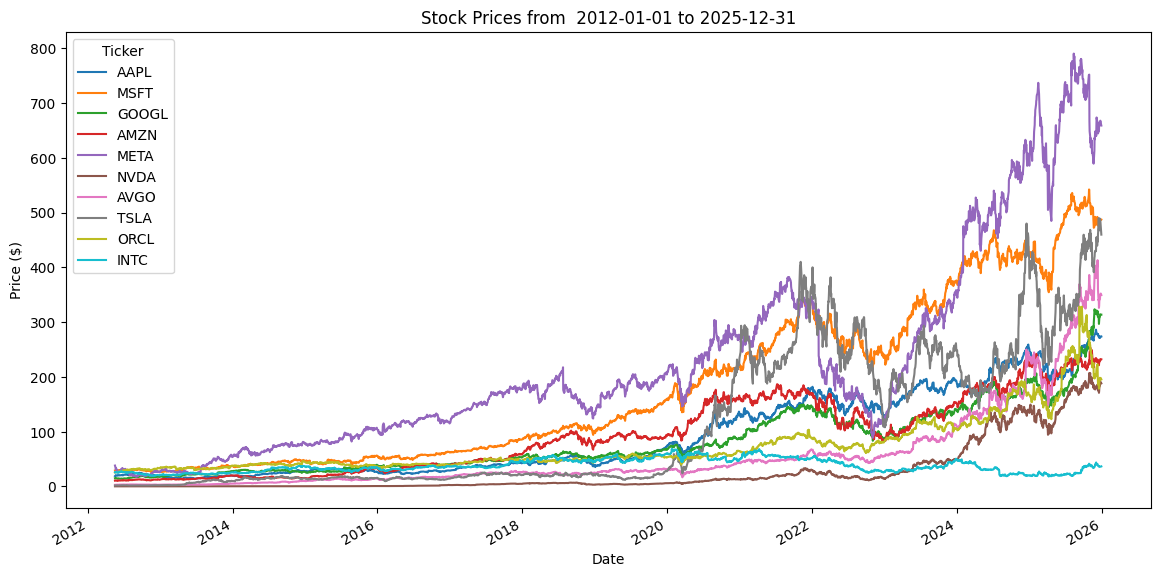

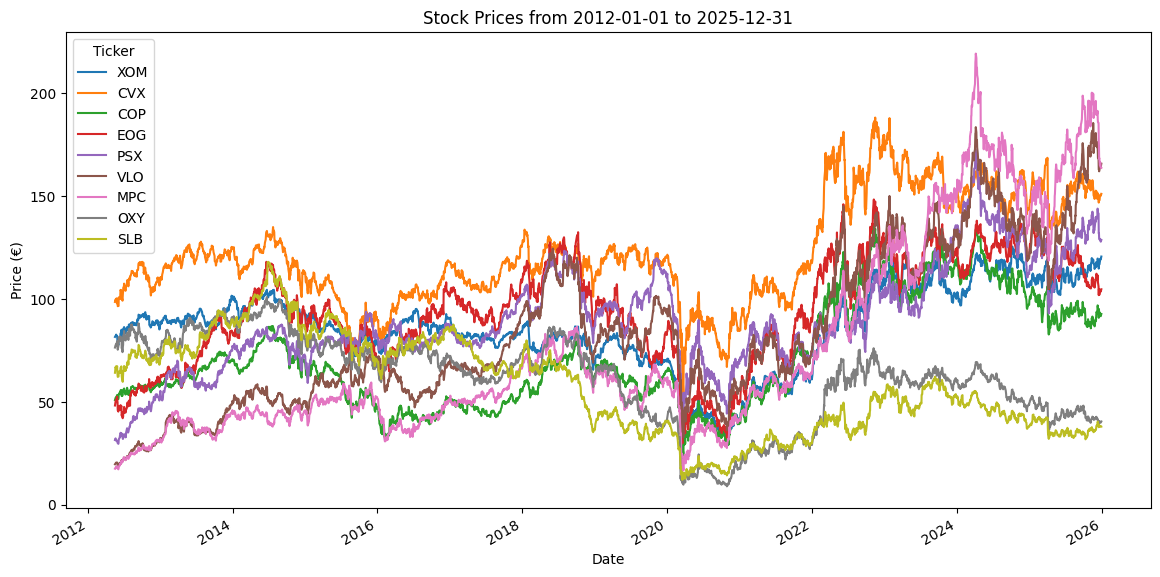

In [295]:
# Plot stock prices for each sector
data[us_tech].plot(figsize=(14,7)
		  , title="Stock Prices from  {start} to {end}".format(start=start, end=end)
		 , ylabel="Price ($)"
		 , xlabel="Date"
		 )

plt.show()

data[us_energy].plot(figsize=(14,7)
					 , title='Stock Prices from {start} to {end}'.format(start=start, end=end)
					 , ylabel='Price (€)'
					 , xlabel='Date'
					 )
plt.show()

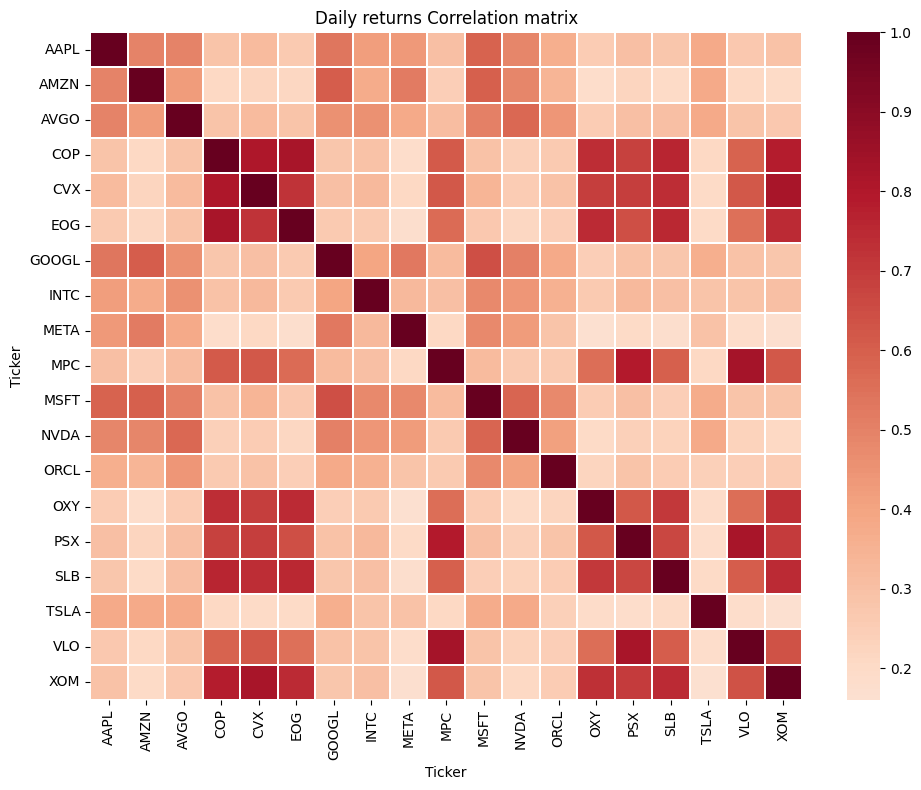

In [296]:
# Daily returns and correlation 

rets = data.pct_change().dropna()
corr = rets.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', center=0, annot= False, linewidths=0.2)
plt.title("Daily returns Correlation matrix")
plt.tight_layout()
plt.show()

In [297]:
# Top-level summary by ticker

summary = pd.DataFrame({
	'start_price':data.iloc[0],
	'end_price':data.iloc[-1],
	'total_return_%':((data.iloc[-1] / data.iloc[0]) - 1) * 100,
	'annualized_vol_%': rets.std() * np.sqrt(252) * 100,
	'annualized_return_%' : rets.mean() * 252 * 100,
})
pd.set_option('display.float_format', '{:.2f}'.format)
display(summary.round(2))

,start_price,end_price,total_return_%,annualized_vol_%,annualized_return_%
Ticker,,,,,
AAPL,18.94,273.76,1345.24,28.36,23.70
AMZN,10.69,232.07,2070.40,32.21,27.84
AVGO,3.00,349.39,11538.57,37.84,42.18
COP,50.82,92.63,82.27,35.12,10.61
CVX,98.46,150.99,53.35,27.23,6.88
EOG,48.15,104.64,117.30,37.47,12.82
GOOGL,15.03,313.56,1986.92,27.60,26.18
INTC,26.07,36.68,40.70,36.44,9.17
META,38.23,658.69,1622.97,39.72,28.85


            US_Tech  US_Energy
Date                          
2012-05-18   100.00     100.00
2012-05-21    99.32     102.11
2012-05-22    97.25     101.89
2012-05-23    97.91     102.17
2012-05-24    97.94     102.17


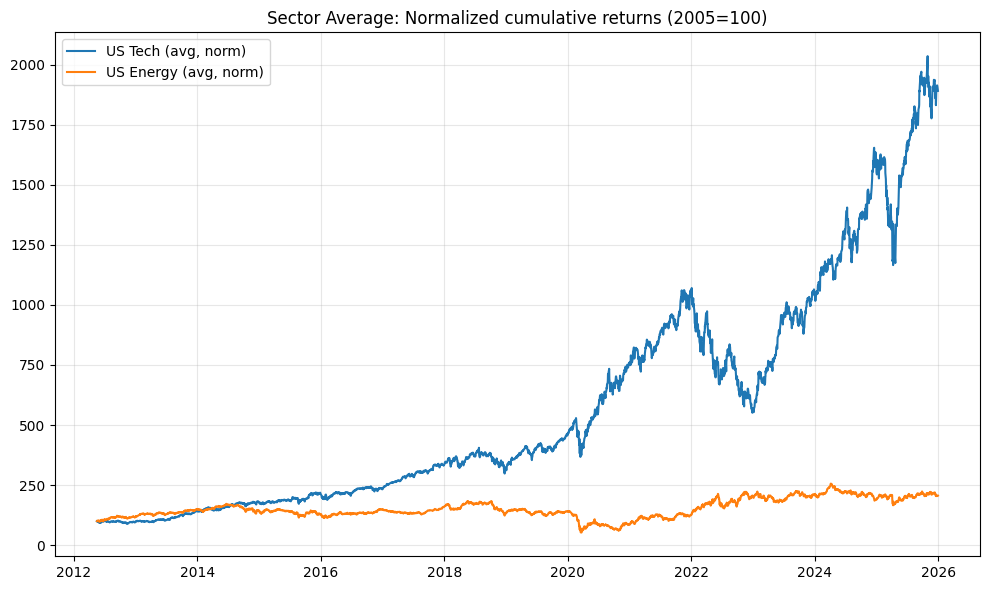

In [298]:
# Compare sector cumulative returns

df_sector = pd.DataFrame(index=data.index)
df_sector['US_Tech'] = data[us_tech].mean(axis=1) / data[us_tech].iloc[0].mean() * 100
df_sector['US_Energy'] = data[us_energy].mean(axis=1) / data[us_energy].iloc[0].mean() * 100
print(df_sector.head())

plt.figure(figsize=(10,6))
plt.plot(df_sector.index, df_sector['US_Tech'], label='US Tech (avg, norm)')
plt.plot(df_sector.index, df_sector['US_Energy'], label='US Energy (avg, norm)')
plt.title('Sector Average: Normalized cumulative returns (2005=100)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [299]:
# Pairwise highest/lowest correlations

flat = corr.unstack().dropna()
flat = flat[flat.index.get_level_values(0) != flat.index.get_level_values(1)]
flat = flat.sort_values()
print("\nMost negatively correlated pairs:", flat.head(1))
print("\nMost positively correlated pairs:", flat.tail(1))


Most negatively correlated pairs: Ticker  Ticker
OXY     META     0.16
dtype: float64

Most positively correlated pairs: Ticker  Ticker
VLO     MPC      0.83
dtype: float64


In [300]:
# Configurable Strategy Parameters 

initial_cash = 200_000
max_positions = 12 				# max concurrent positions
position_fraction = 0.18 		# fraction of current portfolio to allocate per new position
rsi_period = 14					# RSI lookback period
rsi_lower_threshold = 30		# RSI lower threshold to buy (entry)
rsi_upper_threshold = 70		# RSI upper threshold to sell (exit)
bb_period = 20					# Bollinger Bands lookback period
bb_k = 2 						# Bollinger Bands width factor
holding_limit_days = 15 		# max holding period in days (force exit after this period - safety measure)
commission_per_trade = 1.0 		# flat commission per trade
slippage_pct = 0.001 			# slippage percentage per trade (0.1% = 0.001)

In [301]:
# Relative Strength Index (RSI) and Bollinger Bands (BB) calculation functions

def compute_rsi(series, period = 14) :
	delta = series.diff()			# Daily price changes
	gain = delta.clip(lower=0)		# Gains (up days)  -  clip(lower=0) sets negative values to 0
	loss = -delta.clip(upper=0)		# Losses (down days)  -  clip(upper=0) sets positive values to 0 and we take negative
	
	# Wilder's EMA smoothing
	avg_gain = gain.ewm(alpha=1/period, adjust = False, min_periods=period).mean()    # exponential weighted moving average
	avg_loss = loss.ewm(alpha=1/period, adjust = False, min_periods=period).mean()
	rs = avg_gain / avg_loss 			# Relative Strength(If rs is 2, it means the average up-moves are twice as big as the average down-moves)
	rsi = 100 - (100 / (1 + rs))
	return rsi

def compute_bbands(series, period=20, k=2):
	sma = series.rolling(window=period).mean()
	std = series.rolling(window=period).std()
	upper = sma + k * std
	lower = sma - k * std
	return sma, upper, lower
	

In [302]:
# Signals

with warnings.catch_warnings():
	warnings.simplefilter("ignore", category=FutureWarning)
	raw = yf.download(tickers, start=start, end= end, progress=False, auto_adjust=True)['Close']
	
raw = raw.dropna()
available_tickers = list(raw.columns)
print('Tickers available:', available_tickers)

data = {}

for t in available_tickers :
	df = pd.DataFrame(index=raw.index)
	df['Close'] = raw[t]
	df['RSI'] = compute_rsi(df['Close'], period= rsi_period)
	df['SMA20'], df['BB_up'], df['BB_low'] = compute_bbands(df['Close'], period= bb_period, k= bb_k)
	
	# Signals: 
	# RSI bounce : RSI crosses from below rsi_entry to above (crossover)
	df['rsi_signal'] = ((df['RSI'] > rsi_lower_threshold) & 
						(df['RSI'].shift(1) < rsi_lower_threshold)).astype(int)
	
	# Bollinger bounce : close crosses above lower band after being below it (recover)
	df['bb_signal']= ((df['Close'] > df['BB_low']) &
					  (df['Close'].shift(1) < df['BB_low'].shift(1))).astype(int)
	
	# Combine : buy if either signal occurs
	df['buy_signal'] = ((df['rsi_signal'] == 1) | 
						(df['bb_signal'] == 1)).astype(int)
	# | = or

	# Exit signals : RSI > rsi_exit OR price > SMA20
	df['exit_signal'] = ((df['RSI'] > rsi_upper_threshold) |
						 (df['Close'] > df['SMA20'])).astype(int)
		
	data[t] = df
display(data['AAPL'].tail())

	

Tickers available: ['AAPL', 'AMZN', 'AVGO', 'COP', 'CVX', 'EOG', 'GOOGL', 'INTC', 'META', 'MPC', 'MSFT', 'NVDA', 'ORCL', 'OXY', 'PSX', 'SLB', 'TSLA', 'VLO', 'XOM']


,Close,RSI,SMA20,BB_up,BB_low,rsi_signal,bb_signal,buy_signal,exit_signal
Date,,,,,,,,,
2025-12-22,270.97,44.06,277.49,285.54,269.44,0,0,0,0
2025-12-23,272.36,47.03,277.31,285.66,268.96,0,0,0,0
2025-12-24,273.81,50.01,277.15,285.64,268.66,0,0,0,0
2025-12-26,273.40,49.17,276.94,285.60,268.29,0,0,0,0
2025-12-29,273.76,49.97,276.69,285.41,267.97,0,0,0,0


In [303]:
# Strategy Backtest loop

dates = raw.index
cash = initial_cash
positions = {t:0 for t in available_tickers}    # units held
position_entry_price = {t: None for t in available_tickers}
position_entry_date = {t: None for t in available_tickers}
portfolio_values = []
trade_log = []                                  # list of dicts with trade info

for date in dates:
	# 1. Compute current porfolio value (Mark to Market)
	pv_positions = sum(positions[t] * data[t].loc[date, 'Close'] for t in available_tickers)
	total_value = cash + pv_positions
	portfolio_values.append({'date' : date, 'total' : total_value, 'cash' : cash, 'positions_value' : pv_positions})

	# 2. Check exits first (Selling)
	for t in available_tickers:
		if positions[t] > 0 :
			# if exit signal or holding limit hit
			if (data[t].loc[date, 'exit_signal'] == 1) or ((date - position_entry_date[t]).days >= holding_limit_days):
				exit_price = data[t].loc[date, 'Close'] * ( 1 - slippage_pct)  # slippage on exit (sell a bit lower)
				qty = positions[t]
				proceeds = qty * exit_price - commission_per_trade
				cash += proceeds
				pnl = (exit_price - position_entry_price[t]) * qty - commission_per_trade
				trade_log.append({
					'ticker': t, 'entry_date' : position_entry_date[t], 'exit_date': date, 
					'entry_price': position_entry_price[t], 'exit_price': exit_price, 
					'qty': qty, 'pnl': pnl
				})
				positions[t] = 0 
				position_entry_price[t] = None
				position_entry_date[t] = None

	# 3. Entries
	open_count = sum(1 for v in positions.values() if v > 0)
	for t in available_tickers:
		if positions[t] == 0 and open_count < max_positions :
			if data[t].loc[date, 'buy_signal'] == 1:
				# compute allocation based on current total_value or available cash
				alloc = min(position_fraction * total_value, cash)
				if alloc <= 0:
					continue
				entry_price = data[t].loc[date, 'Close'] * (1 + slippage_pct)   # buy a bit higher
				qty = math.floor((alloc - commission_per_trade) / entry_price)
				if qty <= 0 :
					continue
				cost = qty * entry_price + commission_per_trade
				cash -= cost
				positions[t] = qty
				position_entry_price[t] = entry_price
				position_entry_date[t] = date
				open_count += 1

# Finalize portfolio values to series
pv_df = pd.DataFrame(portfolio_values).set_index('date')
pv_df['total'] = pv_df['total']
pv_series = pv_df['total']

In [309]:
# Performance metrics

def compute_metrics(equity_series):
	returns = equity_series.pct_change().dropna()
	total_return = equity_series.iloc[-1] / equity_series.iloc[0]
	ann_return = (1 + total_return) ** (252.0 / len(returns)) - 1 if len(returns) > 0 else np.nan
	ann_vol = returns.std() * np.sqrt(252)
	sharpe = (returns.mean() / returns.std()) * np.sqrt(252) if returns.std () != 0 else np.nan
	cummax = equity_series.cummax()
	drawdown = (equity_series - cummax) / cummax
	max_drawdown = drawdown.min()
	return {
		'total_return' : total_return,
		'ann_return' : ann_return,
		'ann_vol': ann_vol,
		'sharpe' : sharpe,
		'max_drawdown' : max_drawdown
	}

metrics = compute_metrics(pv_series)
print("\nPortfolio performance:")

for k,v in metrics.items(): 
	if isinstance(v, float):
		print(f"{k}: {v:.4f}")
	else:
		print(f"{k}: {v}")

# Trades summary
trades = pd.DataFrame(trade_log)
if not trades.empty: 
	wins = trades[trades['pnl'] > 0]
	losses = trades[trades['pnl'] <= 0]
	win_rate = len(wins) / len(trades)
	avg_win = wins['pnl'].mean() if len(wins)>0 else np.nan
	avg_loss = losses['pnl'].mean() if len(losses)>0 else np.nan
	print("\nTrades summary:")
	print(f"# trades: {len(trades)}, wins: {len(wins)}, losses: {len(losses)}, win_rate: {win_rate:.2%}")
	print(f" avg_win: {avg_win:.2f}, avg_loss: {avg_loss:.2f}")
else: 
	print("\nNo trades were executed with current settings.")

# Slide last 3 years of portfolio value
end_date = pv_series.index[-1]
start_date = end_date - pd.DateOffset(years=3)
pv_slice = pv_series.loc[start_date:end_date]

# Compute cumulative profit
profit_slice = pv_slice - pv_slice.iloc[0]


Portfolio performance:
total_return: 2.1707
ann_return: 0.0887
ann_vol: 0.1702
sharpe: 0.4205
max_drawdown: -0.4722

Trades summary:
# trades: 1046, wins: 654, losses: 392, win_rate: 62.52%
 avg_win: 1677.29, avg_loss: -2197.14


Simulation Buy & Hold démarrée le : 2024-12-30


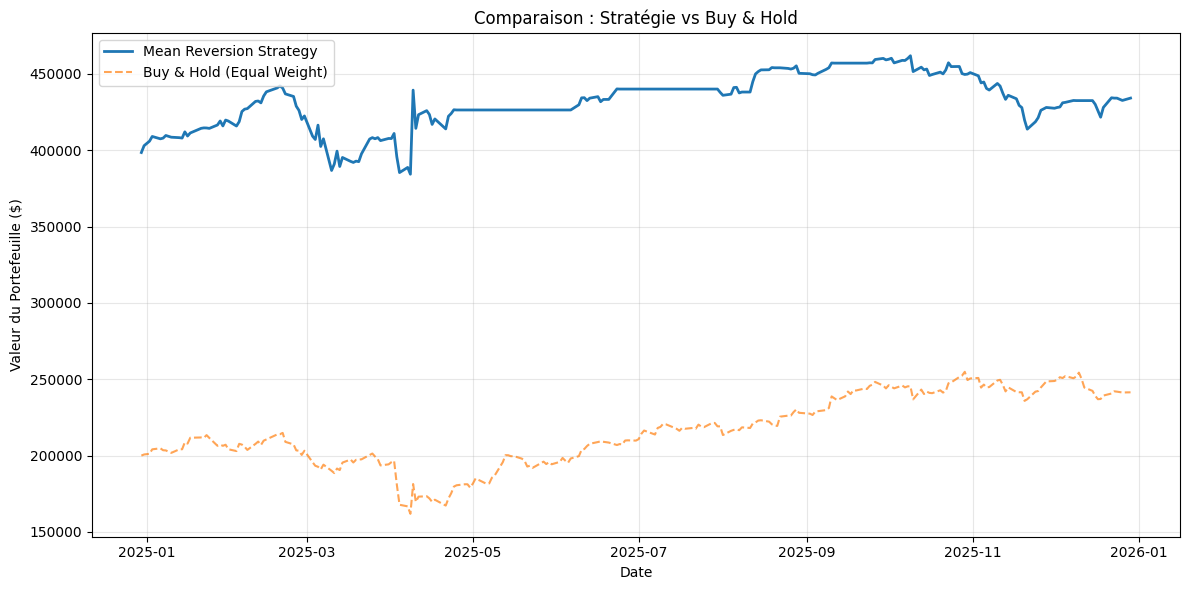

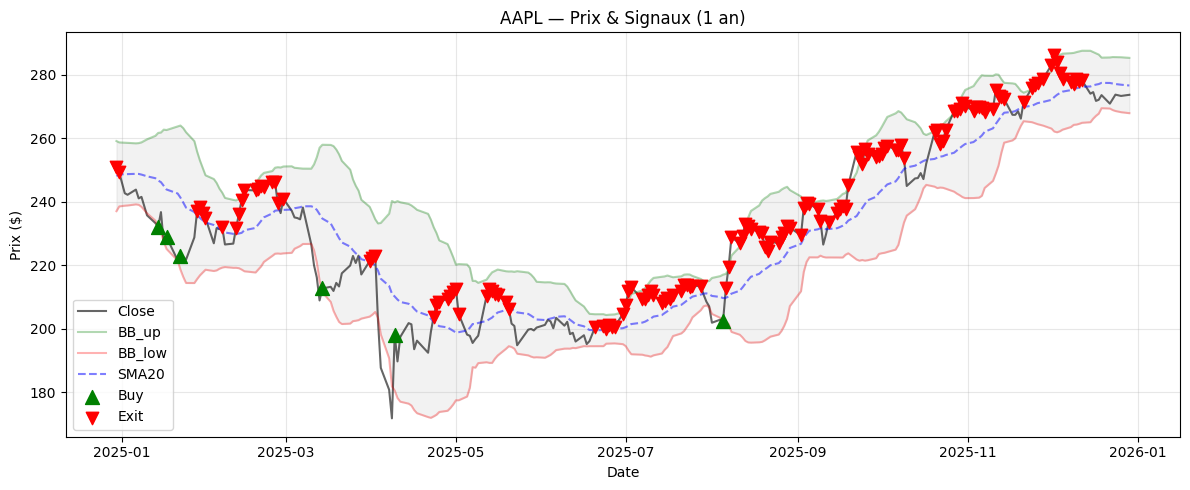

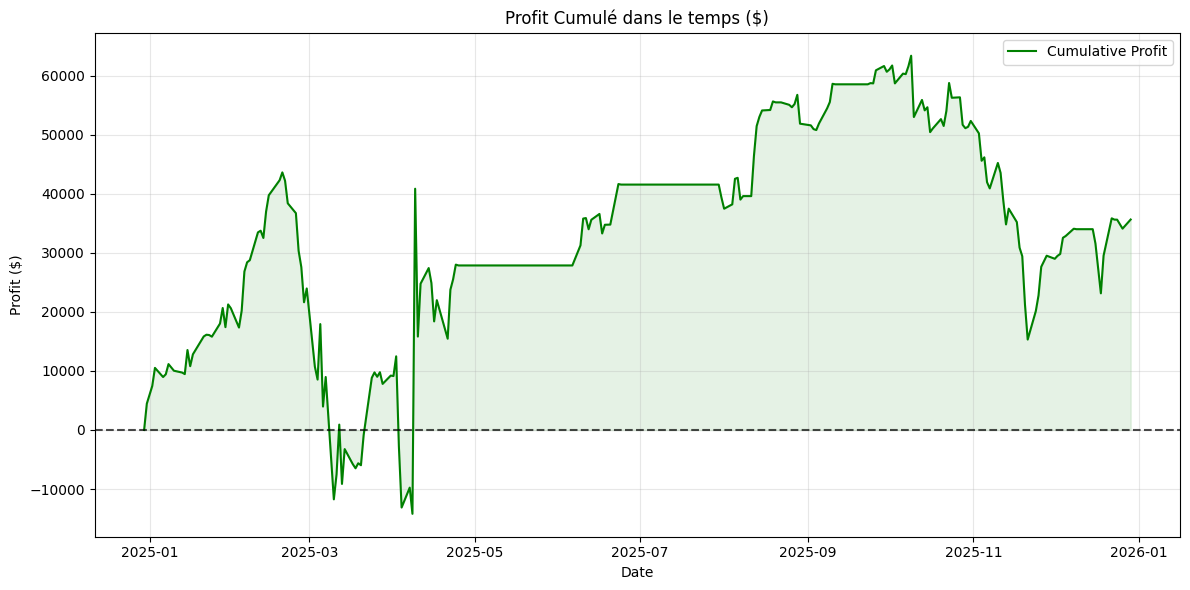

In [317]:
# --- 1. Définition de la période (Ici 1 an comme dans votre script) ---
end_date = pv_series.index[-1]
start_date = end_date - pd.DateOffset(years=1) # Modifiez 'years=1' ici si vous voulez 3 ans

# --- 2. Calcul du Buy & Hold (Synchronisé sur la date de début) ---
# On isole d'abord les prix sur la période concernée
price_slice = raw.loc[start_date:end_date]
n = len(available_tickers)

# On recalcule le portefeuille Buy & Hold comme si on investissait aujourd'hui (début de la période)
if n > 0 and not price_slice.empty:
    # On prend la première date réelle disponible dans la plage
    first_valid_date = price_slice.index[0]
    
    alloc = initial_cash / n
    shares = {}
    cash_leftover = 0.0
    
    print(f"Simulation Buy & Hold démarrée le : {first_valid_date.date()}")
    
    for t in available_tickers: 
        # On achète au prix du DEBUT de la période (pas 2005)
        start_price = price_slice.loc[first_valid_date, t]
        
        # Sécurité si le prix est NaN
        if pd.isna(start_price) or start_price == 0:
            shares[t] = 0
            cash_leftover += alloc
        else:
            qty = math.floor(alloc / start_price)
            shares[t] = qty
            cash_leftover += (alloc - qty * start_price)
            
    # Calcul de la valeur quotidienne sur cette période seulement
    bnh_slice = (price_slice[available_tickers] * pd.Series(shares)).sum(axis=1) + cash_leftover

else:
    # Fallback si données vides : on garde le cash plat
    bnh_slice = pd.Series(data=initial_cash, index=price_slice.index)

# --- 3. Préparation des données Stratégie ---
pv_slice = pv_series.loc[start_date:end_date]

# Calcul du profit cumulé (pour le 3ème graphique)
profit_slice = pv_slice - pv_slice.iloc[0]


# --- 4. Graphique 1 : Stratégie vs Buy & Hold ---
plt.figure(figsize=(12,6))
plt.plot(pv_slice.index, pv_slice.values, label='Mean Reversion Strategy', linewidth=2)
plt.plot(bnh_slice.index, bnh_slice.values, label='Buy & Hold (Equal Weight)', linestyle='--', alpha=0.7)

plt.title('Comparaison : Stratégie vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Valeur du Portefeuille ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# --- 5. Graphique 2 : Signaux sur une action ---
sample_ticker = available_tickers[0] # Prend le premier ticker disponible
if sample_ticker in data:
    df = data[sample_ticker].copy()
    df_slice = df.loc[start_date:end_date]  # Slice sur la même période
    
    plt.figure(figsize=(12,5))
    # Prix et Bandes
    plt.plot(df_slice.index, df_slice['Close'], label='Close', color='black', alpha=0.6)
    plt.plot(df_slice.index, df_slice['BB_up'], label='BB_up', color='green', alpha=0.3)
    plt.plot(df_slice.index, df_slice['BB_low'], label='BB_low', color='red', alpha=0.3)
    plt.fill_between(df_slice.index, df_slice['BB_up'], df_slice['BB_low'], color='gray', alpha=0.1)

    # SMA20 (optionnel, pour la clarté)
    if 'SMA20' in df_slice.columns:
        plt.plot(df_slice.index, df_slice['SMA20'], label='SMA20', linestyle='--', color='blue', alpha=0.5)

    # Signaux
    buy_dates = df_slice.index[df_slice['buy_signal'] == 1]
    exit_dates = df_slice.index[df_slice['exit_signal'] == 1]

    plt.scatter(buy_dates, df_slice.loc[buy_dates, 'Close'], marker='^', s=100, color='green', label='Buy', zorder=5)
    plt.scatter(exit_dates, df_slice.loc[exit_dates, 'Close'], marker='v', s=80, color='red', label='Exit', zorder=5)

    plt.title(f'{sample_ticker} — Prix & Signaux (1 an)')
    plt.xlabel('Date')
    plt.ylabel('Prix ($)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# --- 6. Graphique 3 : Profit Cumulé ---
plt.figure(figsize=(12,6))
plt.plot(profit_slice.index, profit_slice.values, label='Cumulative Profit', color='green')
plt.fill_between(profit_slice.index, profit_slice.values, 0, color='green', alpha=0.1) # Ajout visuel
plt.axhline(0, color='black', linestyle='--', alpha=0.7)

plt.title('Profit Cumulé dans le temps ($)')
plt.xlabel('Date')
plt.ylabel('Profit ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()